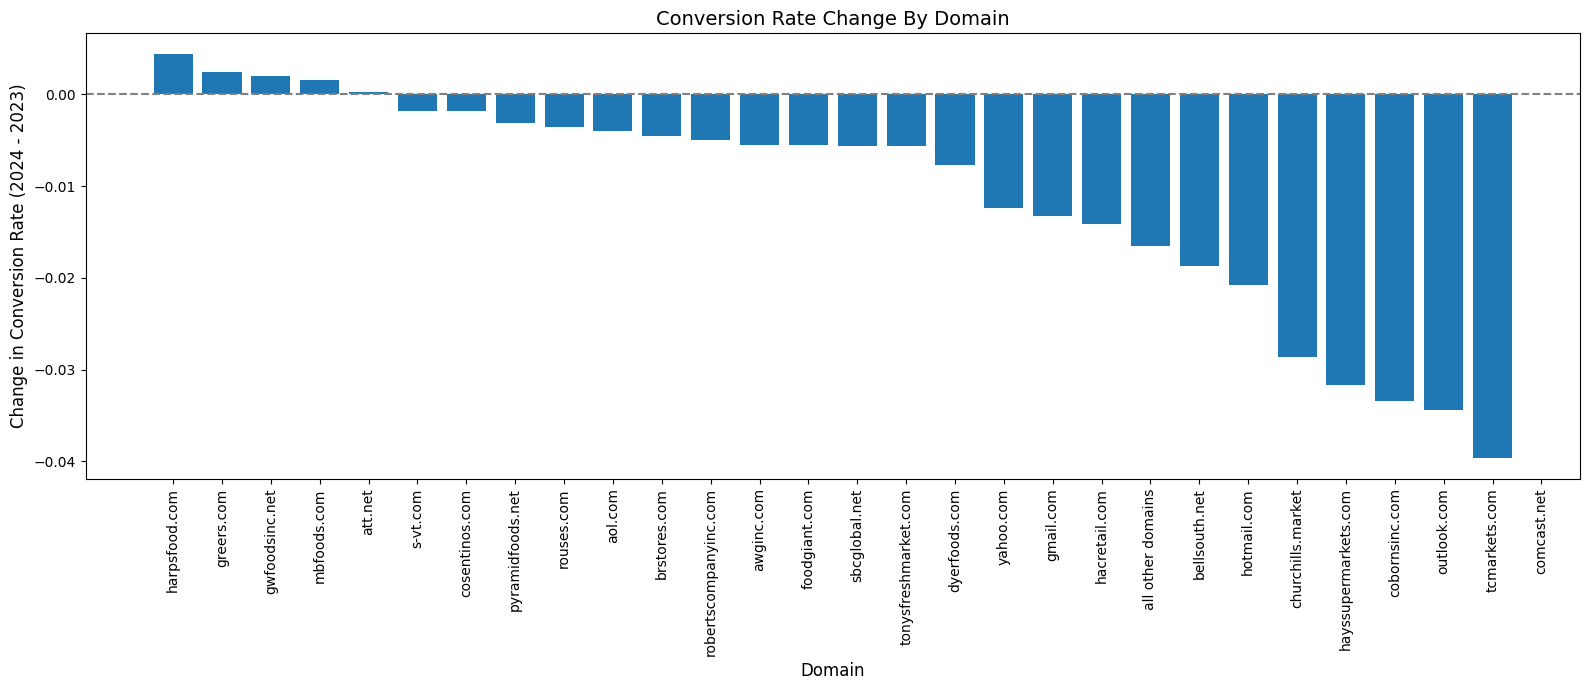

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load the CSV
df = pd.read_csv("/content/2023&2024domain.csv")

# 2. Extract year from date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

# 3. Calculate conversion rate
df['Conversion Rate'] = df['Unique Clicks'] / df['Sent']

# 4. Group by Domain and Year, then unstack to get 2023 and 2024 side by side
conversion_summary = df.groupby(['Domain', 'Year'])['Conversion Rate'].mean().unstack()

# 5. Calculate change from 2023 to 2024
conversion_summary['Change'] = conversion_summary[2024] - conversion_summary[2023]

# 6. Sort by change (optional for better visual)
conversion_summary_sorted = conversion_summary.sort_values('Change', ascending=False)

# 7. Plot the change
plt.figure(figsize=(16, 7))
plt.bar(conversion_summary_sorted.index, conversion_summary_sorted['Change'])
plt.axhline(0, color='gray', linestyle='--')
plt.title("Conversion Rate Change By Domain", fontsize=14)
plt.xlabel("Domain", fontsize=12)
plt.ylabel("Change in Conversion Rate (2024 - 2023)", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
